##
Student Performance Indicator

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('data/study.csv')

In [4]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [5]:
df.shape

(1000, 8)

In [6]:
df.isna().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

In [7]:
df.duplicated().sum()

0

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [9]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

In [11]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [10]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [12]:
print("Categories in 'gender' variable:      " , end = " " )
print(df['gender'].unique())
print("Categories in 'race_ethnicity' variable:      " , end = " ")
print(df['race_ethnicity'].unique())
print("Catogries in 'parental_level_of_education' variable     " , end =  " " )
print(df['parental_level_of_education'].unique())
print("Catogries in 'test_preparation_course' variable     " , end =  " " )
print(df['test_preparation_course'].unique())
print("Catogries in 'lunch' variable     " , end =  " " )
print(df['lunch'].unique())

Categories in 'gender' variable:       ['female' 'male']
Categories in 'race_ethnicity' variable:       ['group B' 'group C' 'group A' 'group D' 'group E']
Catogries in 'parental_level_of_education' variable      ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Catogries in 'test_preparation_course' variable      ['none' 'completed']
Catogries in 'lunch' variable      ['standard' 'free/reduced']


In [13]:
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

print('We have {} numerical features : {}'.format(len(numeric_features) , numeric_features))
print('We have {} categorical features: {}'.format(len(categorical_features) , categorical_features))

We have 3 numerical features : ['math_score', 'reading_score', 'writing_score']
We have 5 categorical features: ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


In [14]:
df['total_score'] = df['math_score'] + df['reading_score'] + df['writing_score']
df['average'] = df['total_score']/3

In [15]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [17]:
reading_full = df[df['reading_score'] == 100]['average'].count()
writing_full = df[df['writing_score']==100]['average'].count()
math_full = df[df['math_score'] == 100]['average'].count()

print(f'Number of students with full marks in math : {math_full}')
print(f'Number of students with full marks in writing : {writing_full}')
print(f'Number of students with full marks in reading : {reading_full}')

Number of students with full marks in math : 7
Number of students with full marks in writing : 14
Number of students with full marks in reading : 17


In [18]:
reading_less_20 = df[df['reading_score'] <= 20]['average'].count()
writing_less_20 = df[df['writing_score']<=20]['average'].count()
math_less_20= df[df['math_score'] <= 20]['average'].count()

print(f'Number of students with less than 20 marks in math : {math_less_20}')
print(f'Number of students with than 20 marks marks in writing : {writing_less_20}')
print(f'Number of students with than 20 marks marks in reading : {reading_less_20}')

Number of students with less than 20 marks in math : 4
Number of students with than 20 marks marks in writing : 3
Number of students with than 20 marks marks in reading : 1


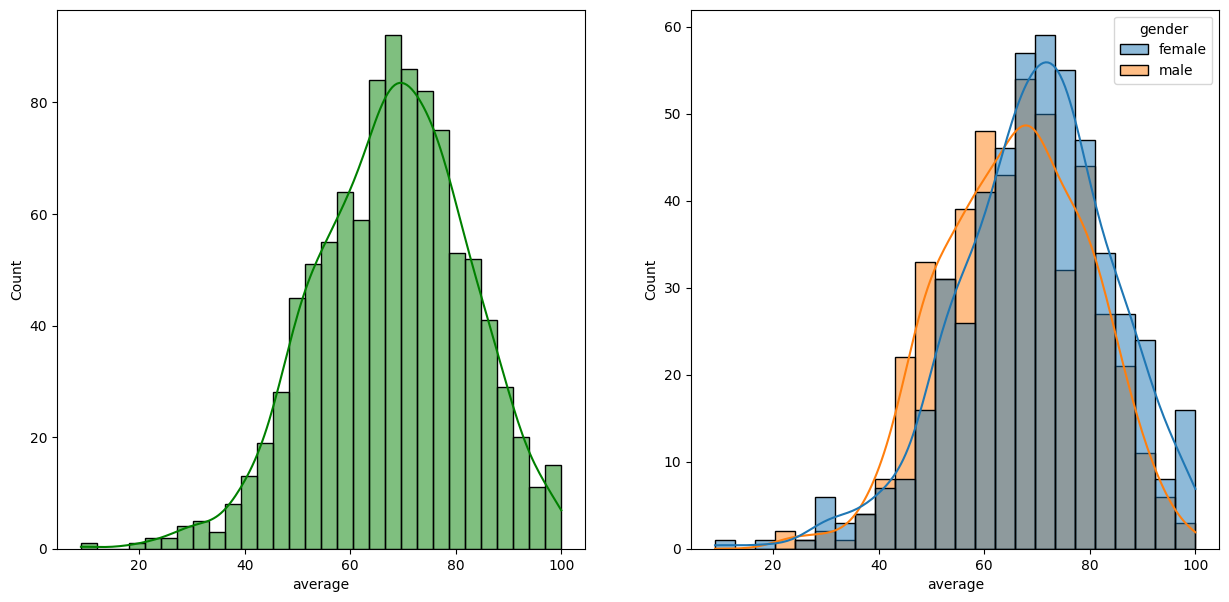

In [22]:
fig , axs = plt.subplots(1 , 2 , figsize = (15,7))
plt.subplot(121)
sns.histplot(data = df , x = 'average' , bins = 30 , kde=True , color='g')
plt.subplot(122)
sns.histplot(data = df , x = 'average' , kde= True , hue= 'gender')
plt.show()

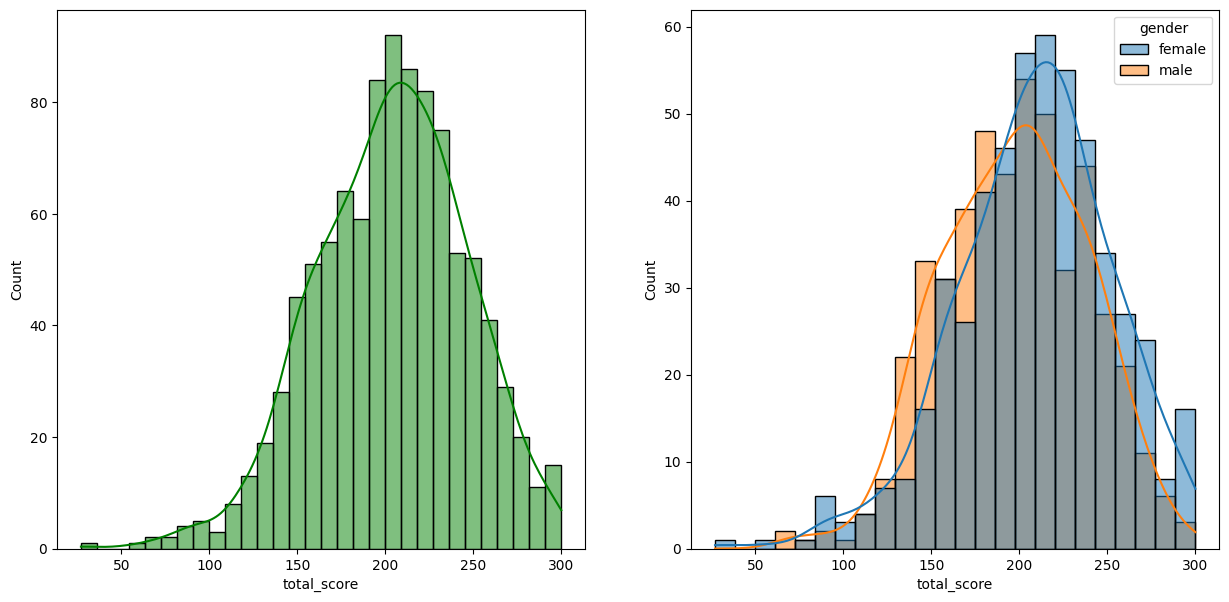

In [23]:
fig , axs = plt.subplots(1 , 2 , figsize = (15,7))
plt.subplot(121)
sns.histplot(data = df , x = 'total_score' , bins = 30 , kde=True , color='g')
plt.subplot(122)
sns.histplot(data = df , x = 'total_score' , kde= True , hue= 'gender')
plt.show()

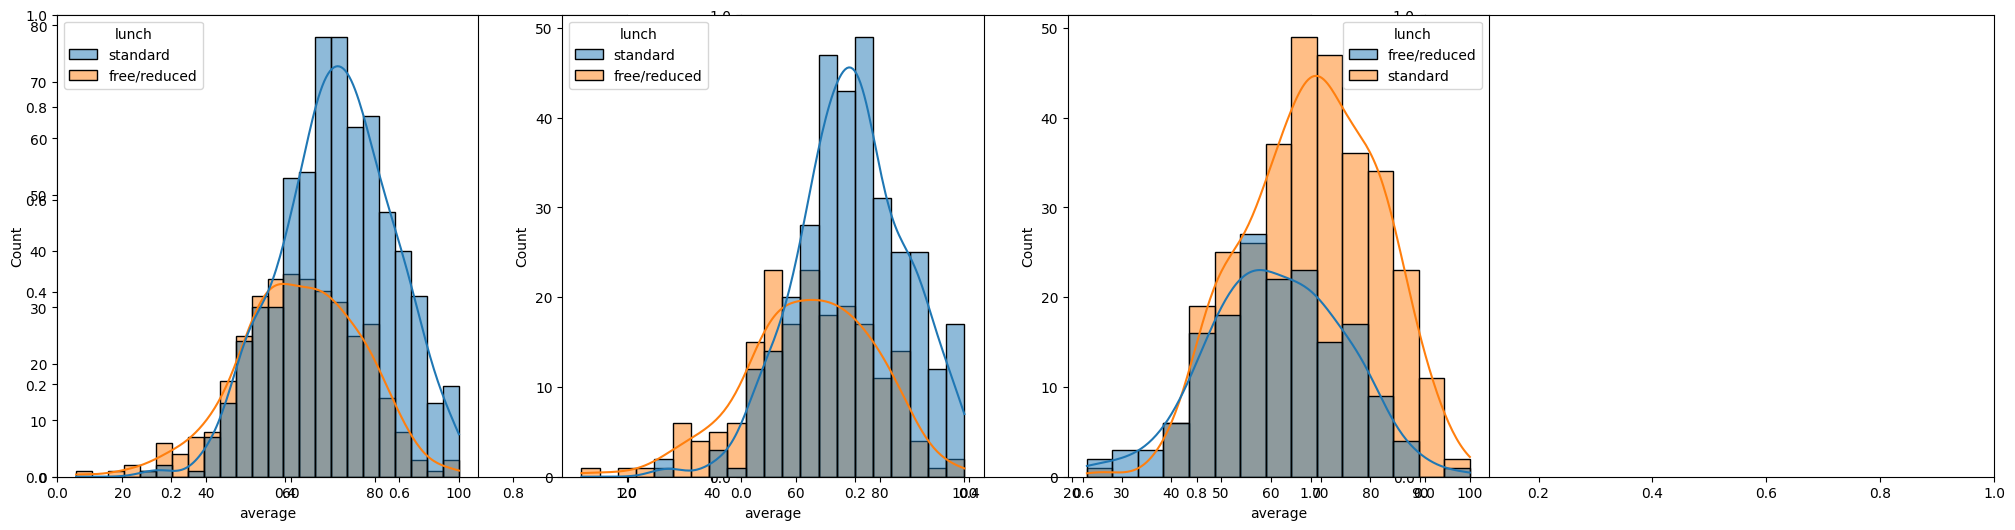

In [25]:
fig , axs = plt.subplots(1  , 3 , figsize = (25 , 6))
plt.subplot(141)
sns.histplot(data = df , x = 'average' , kde = True , hue='lunch')
plt.subplot(142)
sns.histplot(data = df[df.gender == 'female'] ,  x = 'average' , kde = True , hue='lunch')
plt.subplot(143)
sns.histplot(data = df[df.gender == 'male'] ,  x = 'average' , kde = True , hue='lunch')
plt.show()

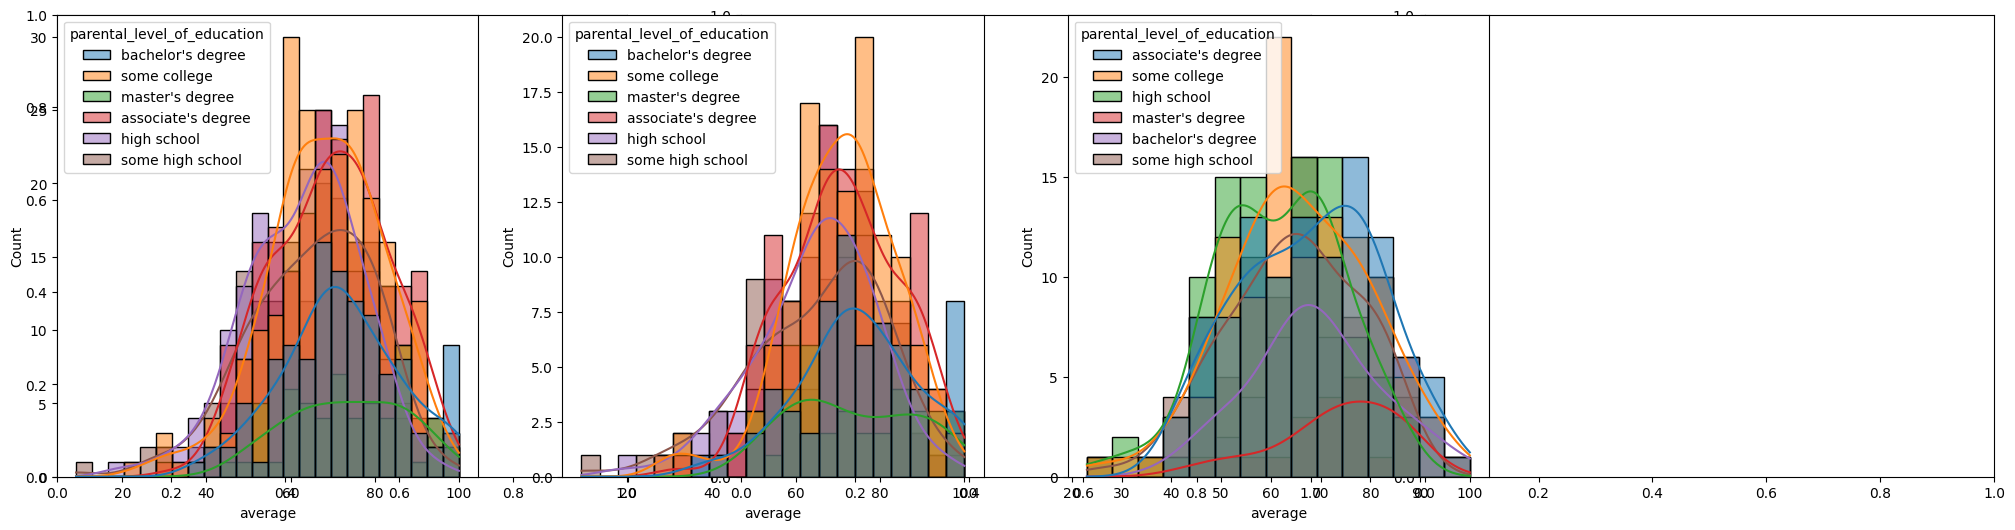

In [ ]:
fig , axs = plt.subplots(1  , 3 , figsize = (25 , 6))
plt.subplot(141)
sns.histplot(data = df , x = 'average' , kde = True , hue='parental_level_of_education')
plt.subplot(142)
sns.histplot(data = df[df.gender == 'female'] ,  x = 'average' , kde = True , hue='parental_level_of_education')
plt.subplot(143)
sns.histplot(data = df[df.gender == 'male'] ,  x = 'average' , kde = True , hue='parental_level_of_education')
plt.show()

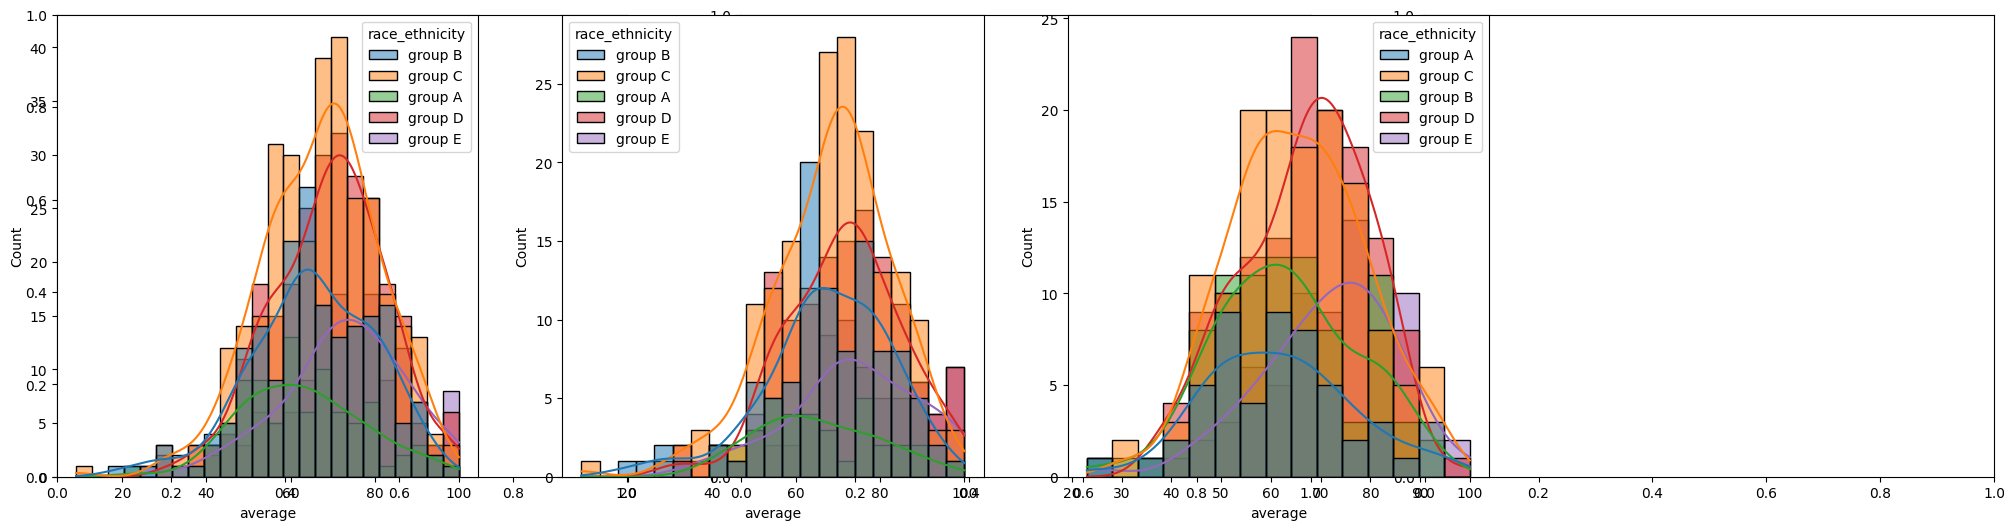

In [30]:
fig , axs = plt.subplots(1  , 3 , figsize = (25 , 6))
plt.subplot(141)
sns.histplot(data = df , x = 'average' , kde = True , hue='race_ethnicity')
plt.subplot(142)
sns.histplot(data = df[df.gender == 'female'] ,  x = 'average' , kde = True , hue='race_ethnicity')
plt.subplot(143)
sns.histplot(data = df[df.gender == 'male'] ,  x = 'average' , kde = True , hue='race_ethnicity')
plt.show()

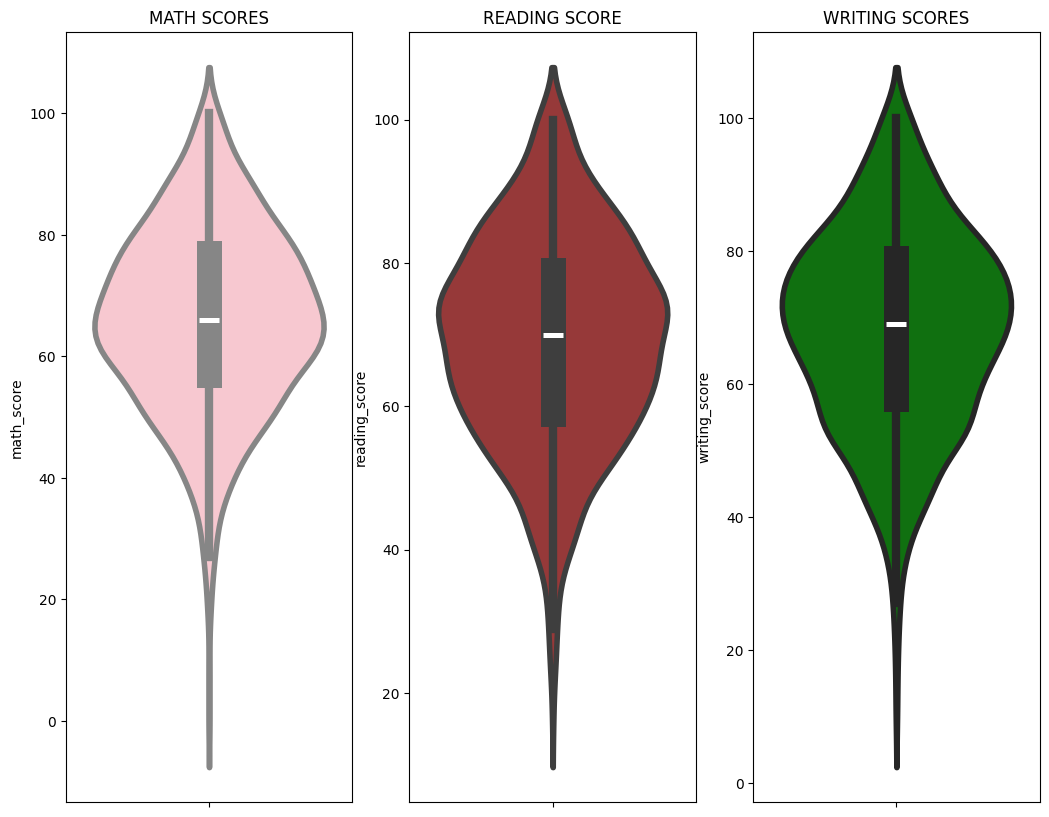

In [33]:
plt.figure(figsize=(17  , 10))
plt.subplot(1 , 4 , 1)
plt.title('MATH SCORES')
sns.violinplot(y = 'math_score' , data = df , color = 'pink' , linewidth=4)
plt.subplot(1 , 4 , 2)
plt.title('READING SCORE')
sns.violinplot(y = 'reading_score' , data = df , color='brown' , linewidth=4)
plt.subplot(1 , 4 , 3)
plt.title('WRITING SCORES')
sns.violinplot(y = 'writing_score' , data = df ,  color='green' , linewidth=4)
plt.show()

In [34]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


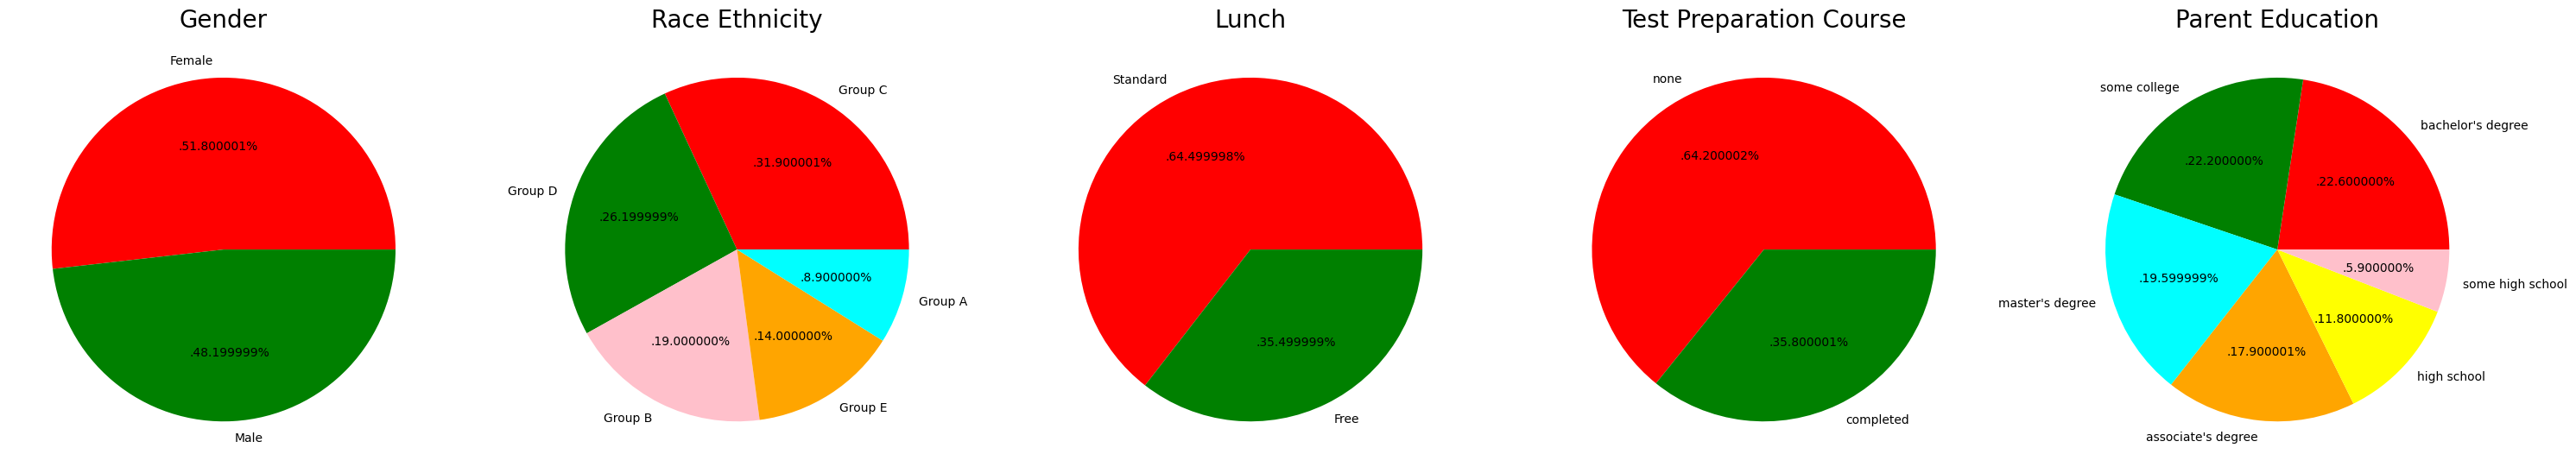

In [35]:
plt.rcParams['figure.figsize'] = (30 , 12)
plt.subplot(1 , 5 , 1)
size = df['gender'].value_counts()
labels = 'Female' ,'Male'
color = ['red' ,'green']

plt.pie(size , colors=color , labels = labels , autopct = '.%2f%%')
plt.title('Gender' ,fontsize = 20)
plt.axis = ('off')


plt.subplot(1 , 5 , 2)
size = df['race_ethnicity'].value_counts()
labels = 'Group C', 'Group D','Group B','Group E','Group A'
color = ['red' ,'green' , 'pink',  'orange' , 'cyan']

plt.pie(size , colors=color , labels = labels , autopct = '.%2f%%')
plt.title('Race Ethnicity' ,fontsize = 20)
plt.axis = ('off')


plt.subplot(1 , 5 , 3)
size = df['lunch'].value_counts()
labels = 'Standard', 'Free'
color = ['red' ,'green']

plt.pie(size , colors=color , labels = labels , autopct = '.%2f%%')
plt.title('Lunch' ,fontsize = 20)
plt.axis = ('off')

plt.subplot(1 , 5 , 4)
size = df['test_preparation_course'].value_counts()
labels = 'none' ,'completed'
color = ['red' ,'green']

plt.pie(size , colors=color , labels = labels , autopct = '.%2f%%')
plt.title('Test Preparation Course' ,fontsize = 20)
plt.axis = ('off')

plt.subplot(1 , 5 , 5)
size = df['parental_level_of_education'].value_counts()
labels = "bachelor's degree" , 'some college' , "master's degree" ,"associate's degree", 'high school' ,'some high school'
color = ['red' ,'green' , 'cyan' , 'orange' , 'yellow' , 'pink']

plt.pie(size , colors=color , labels = labels , autopct = '.%2f%%')
plt.title('Parent Education' ,fontsize = 20)
plt.axis = ('off')

plt.tight_layout()
plt.grid()
plt.show()